In [19]:
import sys
import os
from os import remove

import torch
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from timm.models import create_model
from timm.data import create_dataset, create_loader

def gratzer_lighter_style_sns():
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.2)
    sns.set_palette(["#76ceff", "#f391a0", "#ffd689", "#bbdda6","#fca97f","#f18abe","#88fdff","#d7a5d9","#a3a6d2"])
    plt.rcParams['figure.figsize'] = (8, 5)
    plt.rcParams['grid.alpha'] = 0.5
    plt.rcParams['grid.linestyle'] = '--'
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
teacher_model = create_model(
                            'resnet101',
                            in_chans=None,
                            num_classes=100,
                            drop_rate=0.,
                            drop_path_rate=None,
                            drop_block_rate=None,
                            global_pool=None,
                            bn_momentum=None,
                            bn_eps=None,
                            checkpoint_path='C:/Users/Martin/Documents/School/Thesis/Git Repository/pytorch-image-models/trained-models/Resnet101-Teacher.tar',
                            )
teacher_model.to(device)
teacher_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [4]:
student_model = create_model(
                            'resnet18',
                            in_chans=None,
                            num_classes=100,
                            drop_rate=0.3,
                            drop_path_rate=None,
                            drop_block_rate=None,
                            global_pool=None,
                            bn_momentum=None,
                            bn_eps=None,
                            checkpoint_path='C:/Users/Martin/Documents/School/Thesis/Git Repository/pytorch-image-models/trained-models/Resnet18-Student.tar',
                            )
student_model.to(device)
student_model.train()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [5]:
student_model_epoch0 = create_model(
                            'resnet18',
                            in_chans=None,
                            num_classes=100,
                            drop_rate=0.,
                            drop_path_rate=None,
                            drop_block_rate=None,
                            global_pool=None,
                            bn_momentum=None,
                            bn_eps=None,
                            checkpoint_path=None,
                            )
student_model_epoch0.to(device)
student_model_epoch0.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [6]:
dataset_train = create_dataset(
        "cifar",
        root="C:/Users/Martin/Documents/School/Thesis/cifar100",
        split="train",
        is_training=True,
        class_map="",
        download=False,
        batch_size=1000,
        seed=2308,
        repeats=0,
        input_img_mode='RGB',
        input_key=None,
        target_key=None,
        num_samples=None,
    )

In [7]:
loader_train = create_loader(
        dataset_train,
        input_size=(3,24,24),
        batch_size=1000,
        is_training=True,
        no_aug=False,
        re_prob=0,
        re_mode="pixel",
        re_count=1,
        re_split=False,
        train_crop_mode=None,
        scale=[0.08, 1.0],
        ratio=[3. / 4., 4. / 3.],
        hflip=0.5,
        vflip=0,
        color_jitter=0.4,
        color_jitter_prob=None,
        grayscale_prob=None,
        gaussian_blur_prob=None,
        auto_augment=None,
        num_aug_repeats=0,
        num_aug_splits=0,
        interpolation="random",
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225),
        num_workers=4,
        distributed=False,
        collate_fn=None,
        pin_memory=False,
        device=device,
        use_prefetcher=False,
        use_multi_epochs_loader=False,
        worker_seeding="all",
    )

In [8]:
def renyi_divergence_gradient(x, y, alpha, T=1.0):
    """
    Computes the gradient of the Rényi divergence D_alpha(P || Q) with respect to x.

    Parameters:
        x (torch.Tensor): Logits for distribution Q (on any device).
        y (torch.Tensor): Logits for distribution P (on any device).
        alpha (float): The Rényi divergence parameter.
        T (float): Temperature scaling parameter (default=1.0).

    Returns:
        torch.Tensor: The gradient of the Rényi divergence w.r.t x.
    """

    p = torch.softmax(y/T,dim=1)
    q = torch.softmax(x/T,dim=1)

    term_1 = torch.sum((torch.pow(p, alpha) * torch.pow(q, 1 - alpha)),axis=1).unsqueeze(1)
    term_2 = torch.div((torch.pow(p, alpha) * torch.pow(q, 1 - alpha)),term_1)
    
    gradient =  1/T * (q  - term_2)

    return gradient

In [80]:
def create_gradient_plot(data,alphas,alpha_adjusted=False,title_adjusted="",baseline=False,advanced_alpha_plot=False,title=True):
    gratzer_lighter_style_sns()
    # Define labels to filter
    labels = [0, 1, 10, 11]
    counts = data.label.value_counts()
    notes = ['None','Student','Teacher','Both']
    
    # Create 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 5))
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # Loop through each label and plot
    for i, label in enumerate(labels):
        subset = data[data.label == label].drop(columns=['label'])
        if advanced_alpha_plot:
            def sigmoid(x):
                return 13.3012 / (1 + np.exp(-(0.9968 * x - 2.9970))) - 0.5755
            subset = subset.div(sigmoid(np.array(alphas)), axis=1)
        elif alpha_adjusted:
            subset = subset.div(alphas, axis=1)
        if baseline:
            subset = subset.div(subset[1], axis=0)
        sns.boxplot(data=subset, showfliers=False, ax=axes[i],color="#76ceff")
        axes[i].set_title(f"Label {label}: {notes[i]} ({counts[label]} obs)")
        axes[i].set_xlabel(r'$\alpha$')
        if advanced_alpha_plot:
            axes[i].set_ylabel(r'$\frac{\partial \mathcal{L}_{\alpha, norm}(\theta,x,y)}{\partial z_j}$')
        elif not alpha_adjusted:
            axes[i].set_ylabel(r'$\frac{\partial \mathcal{L}_{\alpha, unscaled}(\theta,x,y)}{\partial z_j}$')
        else:
            axes[i].set_ylabel(r'$\frac{\partial \mathcal{L}_{\alpha}(\theta,x,y)}{\partial z_j}$')
    
    if title:
        if advanced_alpha_plot:
            if baseline:
                fig.suptitle(f"Gradients Boxplots - Alpha Sigmoid Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
            else:
                fig.suptitle(f"Gradients Boxplots - Alpha Sigmoid Adjusted - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
        elif alpha_adjusted:
            if baseline:
                fig.suptitle(f"Gradients Boxplots - Alpha Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
            else:
                fig.suptitle(f"Gradients Boxplots - Alpha Adjusted - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
        else:
            if baseline:
                fig.suptitle(f"Gradients Boxplots - Without Adjustment with Baseline in Alpha = 1 - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
            else:
                fig.suptitle(f"Gradients Boxplots - Without Adjustment - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
    else:
        if advanced_alpha_plot:
            if baseline:
                print(f"Gradients Boxplots - Alpha Sigmoid Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model")
            else:
                print(f"Gradients Boxplots - Alpha Sigmoid Adjusted - {title_adjusted} Student Model")
        elif alpha_adjusted:
            if baseline:
                print(f"Gradients Boxplots - Alpha Adjusted with Baseline in Alpha = 1 - {title_adjusted} Student Model")
            else:
                print(f"Gradients Boxplots - Alpha Adjusted - {title_adjusted} Student Model")
        else:
            if baseline:
                print(f"Gradients Boxplots - Without Adjustment with Baseline in Alpha = 1 - {title_adjusted} Student Model")
            else:
                print(f"Gradients Boxplots - Without Adjustment - {title_adjusted} Student Model")
    
    plt.tight_layout()

In [10]:
def gradient_plot(student_model,teacher_model,title_adjusted,temperature=1,baseline=False,advanced_alpha_plot=False,title=True):
    for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break
        
    grads = []
    alphas = [0.5,0.75,1,1.25,1.5,2,3.5,5,7.5,10]
    for alpha in alphas:
        grads.append(renyi_divergence_gradient(student_output,teacher_output,alpha,temperature).reshape(-1).detach().cpu().numpy() * temperature ** 2)
        
    data = pd.DataFrame({cat: arr for cat, arr in zip(alphas, grads)})
    
    one_hot_teacher = torch.zeros((teacher_pred.shape[0], 100), device='cuda:0')
    one_hot_teacher.scatter_(1, teacher_pred.unsqueeze(1), 1)
    
    one_hot_student = torch.zeros((student_pred.shape[0], 100), device='cuda:0')
    one_hot_student.scatter_(1, student_pred.unsqueeze(1), 1)
    
    label = one_hot_teacher.reshape(-1) * 10 + one_hot_student.reshape(-1)
    data['label'] = label.cpu().numpy()
    
    create_gradient_plot(data,alphas,alpha_adjusted=False,title_adjusted=title_adjusted,baseline=baseline,title=title)
    plt.savefig(f'gradients_boxplot_noadj.pdf')
    plt.show()
    
    create_gradient_plot(data,alphas,alpha_adjusted=True,title_adjusted=title_adjusted,baseline=baseline,title=title)
    plt.savefig(f'gradients_boxplot_adjusted.pdf')
    plt.show()
    
    if advanced_alpha_plot:
        create_gradient_plot(data,alphas,alpha_adjusted=True,title_adjusted=title_adjusted,baseline=baseline,advanced_alpha_plot=True,title=title)
        plt.savefig(f'gradients_boxplot_sigmoid.pdf')
        plt.show()

Gradients Boxplots - Without Adjustment - Epoch 0 Student Model


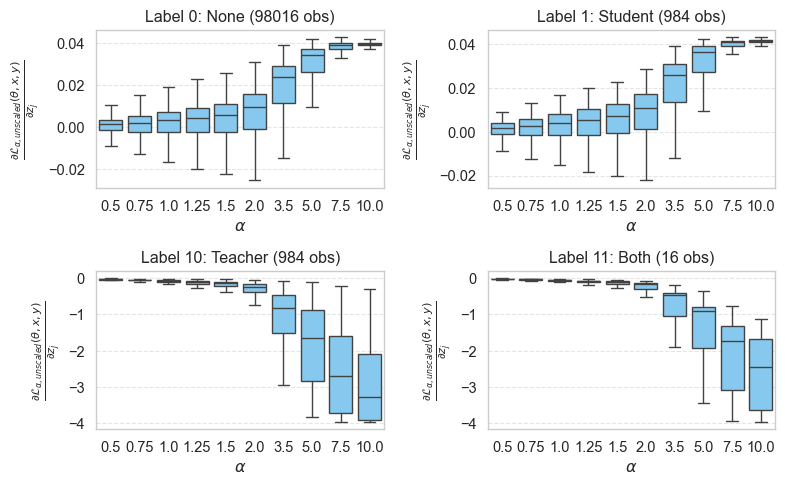

Gradients Boxplots - Alpha Adjusted - Epoch 0 Student Model


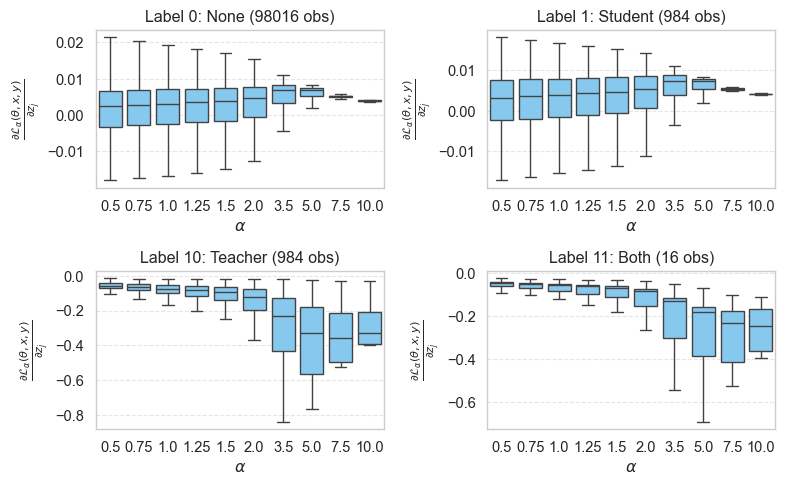

Gradients Boxplots - Alpha Sigmoid Adjusted - Epoch 0 Student Model


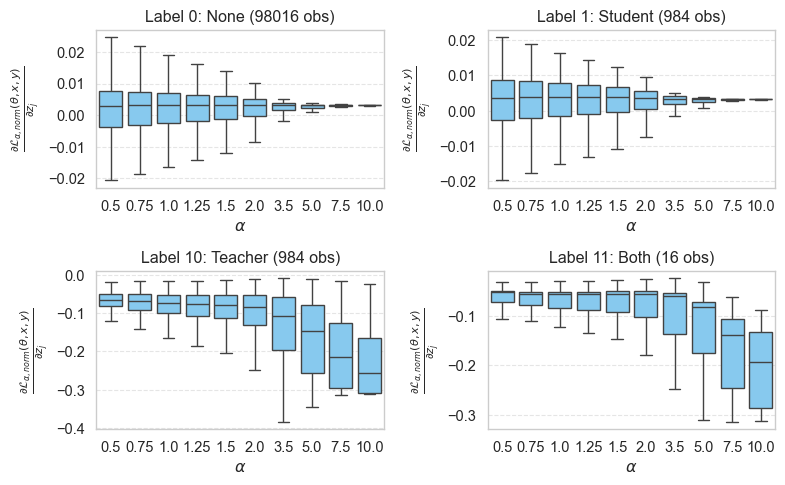

In [81]:
gradient_plot(student_model_epoch0,teacher_model,title_adjusted="Epoch 0",temperature=4,title=False,advanced_alpha_plot=True)

In [15]:
def logit_plot(student_model,teacher_model,title_adjusted,temperature=1):
    for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break
        
    data =  [teacher_output.reshape(-1).detach().cpu().numpy(),student_output.reshape(-1).detach().cpu().numpy()]
    
    data = pd.DataFrame({cat: arr for cat, arr in zip(["teacher","student"], data)})
    
    one_hot_teacher = torch.zeros((teacher_pred.shape[0], 100), device='cuda:0')
    one_hot_teacher.scatter_(1, teacher_pred.unsqueeze(1), 1)
    
    one_hot_student = torch.zeros((student_pred.shape[0], 100), device='cuda:0')
    one_hot_student.scatter_(1, student_pred.unsqueeze(1), 1)
    
    label = one_hot_teacher.reshape(-1) * 10 + one_hot_student.reshape(-1)
    data['label'] = label.cpu().numpy()
    
    ## Ploting
    labels = [0, 1, 10, 11]
    counts = data.label.value_counts()
    notes = ['None','Student','Teacher','Both']
    
    # Create 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 5))
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # Loop through each label and plot
    for i, label in enumerate(labels):
        subset = data[data.label == label].drop(columns=['label'])
        sns.boxplot(data=subset, showfliers=False, ax=axes[i])
        axes[i].set_title(f"Label {label}: {notes[i]} ({counts[label]} obs)")
        axes[i].set_xlabel(r'$\alpha$')
    
    fig.suptitle(f"Logits Boxplots - {title_adjusted} Student Model", fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

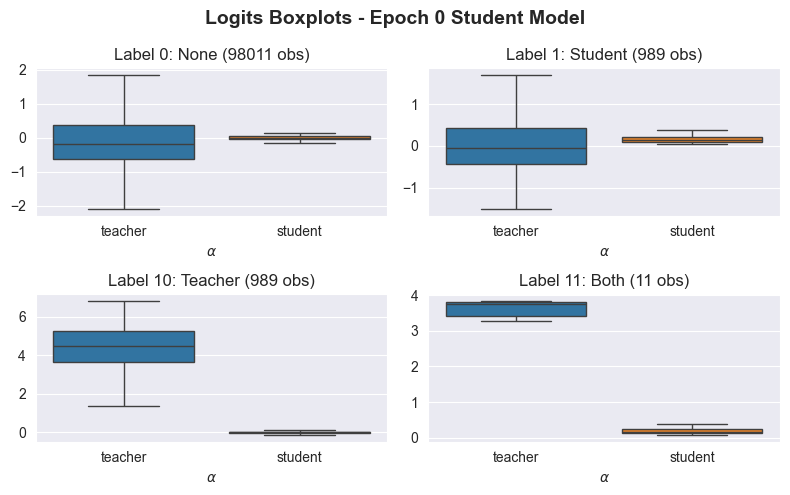

In [71]:
logit_plot(student_model_epoch0,teacher_model,title_adjusted="Epoch 0",temperature=1)

In [36]:
temperature = 4
for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model_epoch0(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break
        
grads = []
alphas = np.arange(0.5,10,0.05)
for alpha in alphas:
    grads.append(renyi_divergence_gradient(student_output,teacher_output,alpha,temperature).reshape(-1).detach().cpu().numpy() * temperature ** 2)
    
data = pd.DataFrame({cat: arr for cat, arr in zip(alphas, grads)})

one_hot_teacher = torch.zeros((teacher_pred.shape[0], 100), device='cuda:0')
one_hot_teacher.scatter_(1, teacher_pred.unsqueeze(1), 1)

one_hot_student = torch.zeros((student_pred.shape[0], 100), device='cuda:0')
one_hot_student.scatter_(1, student_pred.unsqueeze(1), 1)

label = one_hot_teacher.reshape(-1) * 10 + one_hot_student.reshape(-1)
data['label'] = label.cpu().numpy()

In [37]:
torch.median(torch.softmax(teacher_output, dim=1))

tensor(0.0029, device='cuda:0', grad_fn=<MedianBackward0>)

Optimized parameters: a = 1.0401, b = -3.2712


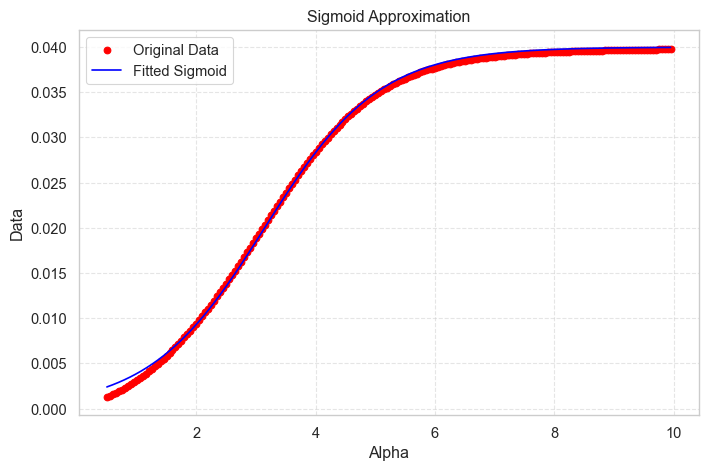

In [38]:
gratzer_lighter_style_sns()
# Define the sigmoid function
def sigmoid(x, a, b) :
    return  (temperature/100) / (1 + np.exp(-(a * x + b)))

# Fit the sigmoid function to the data
popt, _ = curve_fit(sigmoid, alphas, np.array(data[data.label==0].drop(columns=['label']).median()), p0=[1, 0]) # Initial guess for a, b

# Extract optimized parameters
a_opt, b_opt = popt
print(f"Optimized parameters: a = {a_opt:.4f}, b = {b_opt:.4f}")

# Generate points for the fitted curve
alpha_fit = np.linspace(min(alphas), max(alphas), 100)
data_fit = sigmoid(alpha_fit, *popt)

# Plot the results
plt.scatter(alphas, np.array(data[data.label==0].drop(columns=['label']).median()), label="Original Data", color="red")
plt.plot(alpha_fit, data_fit, label="Fitted Sigmoid", color="blue")
plt.xlabel("Alpha")
plt.ylabel("Data")
plt.legend()
plt.title("Sigmoid Approximation")
plt.show()

In [50]:
1: a = 3.7914, b = -2.9805
4: a = 1.0457, b = -3.2687

SyntaxError: invalid syntax (1946916055.py, line 1)

Optimized parameters: a = 0.9886, b = -2.9720, c = 0.0416, d = 0.0019


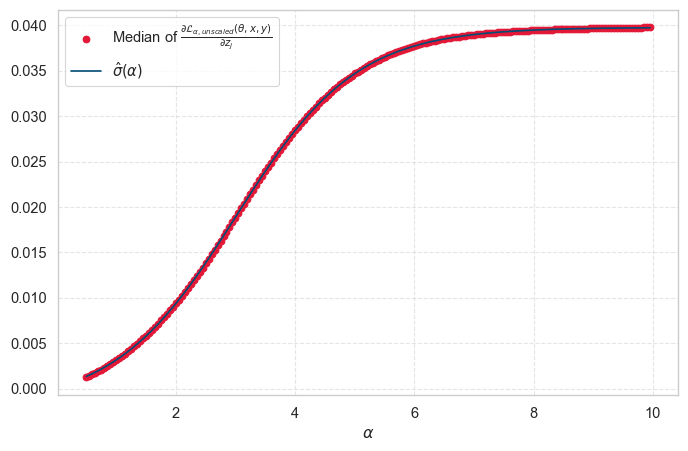

In [82]:
gratzer_lighter_style_sns()
# Define the sigmoid function
def sigmoid(x, a, b, c, d):
    return c / (1 + np.exp(-(a * x + b))) - d

# Fit the sigmoid function to the data
popt, _ = curve_fit(sigmoid, alphas, np.array(data[data.label==0].drop(columns=['label']).median()), p0=[1, 0, 1, 1]) # Initial guess for a, b

# Extract optimized parameters
a_opt, b_opt, c_opt, d_opt  = popt
print(f"Optimized parameters: a = {a_opt:.4f}, b = {b_opt:.4f}, c = {c_opt:.4f}, d = {d_opt:.4f}")

# Generate points for the fitted curve
alpha_fit = np.linspace(min(alphas), max(alphas), 200)
data_fit = sigmoid(alpha_fit, *popt)

# Plot the results
plt.scatter(alphas, np.array(data[data.label==0].drop(columns=['label']).median()), label=r'Median of $\frac{\partial \mathcal{L}_{\alpha,unscaled}(\theta,x,y)}{\partial z_j}$', color="#e31837")
plt.plot(alpha_fit, data_fit, label=r'$\hat{\sigma}(\alpha)$', color="#004c76")
plt.xlabel(r'$\alpha$')
#plt.ylabel(r'$\frac{\partial \mathcal{L}^{\prime}_{\alpha}(\theta,x,y)}{\partial z_j}$')
plt.legend()
#plt.title("Sigmoid Approximation")
plt.savefig('sigmoid_approx.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
medians = data[data.label==0].drop(columns=['label']).median()

In [52]:
def sigmoid_fitted(x):
    return 1/medians.iloc[10] * (0.0415 / (1 + np.exp(-(0.9992 * x - 2.9933))) - 0.0018)

alphas = np.array([0.5, 0.625, 0.75, 0.875, 1, 1.25, 1.5, 2, 3.5, 5, 7.5])
values = sigmoid_fitted(alphas)
for i in range(len(alphas)):
    print(f'{alphas[i]}: {values[i]:.2f}')

0.5: 0.43
0.625: 0.55
0.75: 0.69
0.875: 0.84
1.0: 1.00
1.25: 1.38
1.5: 1.83
2.0: 2.97
3.5: 7.60
5.0: 10.97
7.5: 12.38


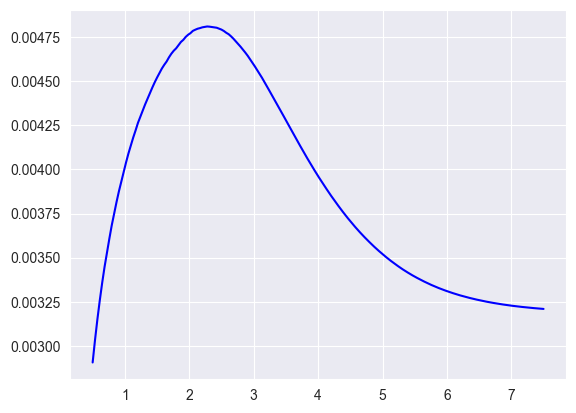

In [53]:
alpha_fit = np.linspace(min(alphas), max(alphas), 190)
data_fit = sigmoid_fitted(alpha_fit)
x = np.array(data[data.label==0].drop(columns=['label']).median())
plt.plot(alpha_fit, x/data_fit, label="Fitted Sigmoid", color="blue")

In [10]:
for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model_epoch0(input)
        #student_output = student_model(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break

alphas = np.arange(0.5,30,0.25)
data = {}

for temperature in np.arange(1,10,1):
    grads = []
    for alpha in alphas:
        grads.append(np.median(renyi_divergence_gradient(student_output,teacher_output,alpha,temperature).reshape(-1).detach().cpu().numpy() * temperature ** 2))

    data[temperature] = np.array(grads)

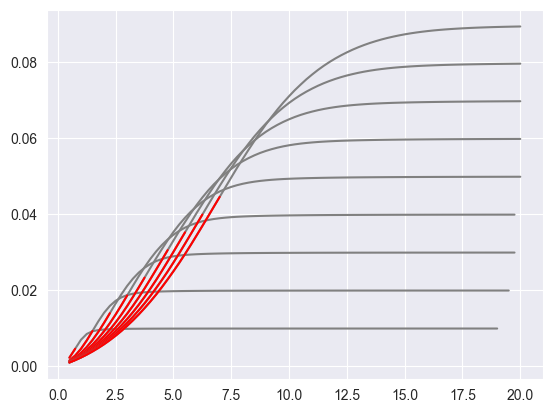

In [13]:
for temperature,_ in data.items():
    plt.plot(alphas,data[temperature],color='gray')

    mask = alphas / temperature < 0.8

    plt.plot(alphas[mask],data[temperature][mask],color='red')

In [16]:
for temperature,_ in data.items():
    plt.plot(alphas,data[temperature])

NameError: name 'data' is not defined

In [7]:
for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model_epoch0(input)
        #student_output = student_model(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break

In [8]:
teacher_output.median()

tensor(-0.1843, device='cuda:0', grad_fn=<MedianBackward0>)

In [9]:
student_output.median()

tensor(-0.0005, device='cuda:0', grad_fn=<MedianBackward0>)

In [11]:
(student_output-teacher_output).median()

tensor(0.1841, device='cuda:0', grad_fn=<MedianBackward0>)

1.0240000000000003e-17

In [38]:
p = 0.06
q = 0.05



In [55]:
x = lambda a,p,q,i : (p[i]**a * q[i]**(1-a))/(np.sum(np.array([np.power(p, exp) for exp in a]) * np.array([np.power(q, 1-exp) for exp in a])))

In [56]:
x(np.array([1,2]),p,q,1)

array([0.01669449, 0.00250417])

In [81]:
p = np.array([0.8,0.03,0.1, 0.07])
q = np.ones_like(p)/ p.shape[0]

In [88]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

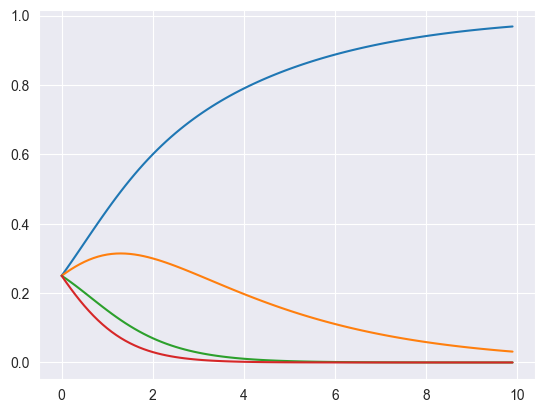

In [101]:
p = np.array([0.6,0.3,0.07, 0.03])
temperature = 2

p = softmax(np.log(p)/temperature)
q = np.ones_like(p)/ p.shape[0]

alphas = np.arange(0,10,0.1)
x = lambda a,p,q,i : (p[i]**a * q[i]**(1-a)) /np.sum(np.array([np.power(p, exp) for exp in a]) * np.array([np.power(q, 1-exp) for exp in a]),axis=1)
for i in range(p.shape[0]):
    plt.plot(alphas,x(alphas,p,q,i))

In [10]:
for batch_idx, (input, target) in enumerate(loader_train):
        input, target = input.to(device), target.to(device)
        teacher_output = teacher_model(input)
        student_output = student_model_epoch0(input)
        #student_output = student_model(input)
        teacher_pred = torch.argmax(teacher_output, dim=1)
        student_pred = torch.argmax(student_output, dim=1)
        break

In [42]:
def total_gradient(x, y, alpha, T=1.0, beta=0.9):
    """
    Computes the gradient of the Rényi divergence D_alpha(P || Q) with respect to x.

    Parameters:
        x (torch.Tensor): Logits for distribution Q (on any device).
        y (torch.Tensor): Logits for distribution P (on any device).
        alpha (float): The Rényi divergence parameter.
        T (float): Temperature scaling parameter (default=1.0).

    Returns:
        torch.Tensor: The gradient of the Rényi divergence w.r.t x.
    """

    p = torch.softmax(y/T,dim=1)
    q = torch.softmax(x/T,dim=1)

    term_1 = torch.sum((torch.pow(p, alpha) * torch.pow(q, 1 - alpha)),axis=1).unsqueeze(1)
    term_2 = torch.div((torch.pow(p, alpha) * torch.pow(q, 1 - alpha)),term_1)
    
    renyi_part =  1/T * (q  - term_2)

    ce_part = 1/T * (q-p)

    return (1-beta)*ce_part+beta*renyi_part

In [37]:
torch.median(total_gradient(student_output,teacher_output,1,4,0.9))

tensor(1.9053e-05, device='cuda:0', grad_fn=<MedianBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<MedianBackward0>)


tensor(0.0002, device='cuda:0', grad_fn=<MedianBackward0>)

In [43]:
torch.median(total_gradient(student_output,teacher_output,5,4,0.9))/torch.median(total_gradient(student_output,teacher_output,1,4,0.9))

tensor(10.3234, device='cuda:0', grad_fn=<DivBackward0>)

In [40]:
0.9*torch.median(renyi_divergence_gradient(student_output,teacher_output,5,4))


tensor(0.0018, device='cuda:0', grad_fn=<MulBackward0>)

In [26]:
(0.1/4)*(torch.median(torch.softmax(student_output/4,dim=1))-torch.median(torch.softmax(teacher_output/4,dim=1)))

tensor(1.9269e-05, device='cuda:0', grad_fn=<MulBackward0>)

In [22]:
torch.median(torch.softmax(student_output/4,dim=1))

tensor(0.0100, device='cuda:0', grad_fn=<MedianBackward0>)